In [1]:
wd <- dirname(dirname(getwd()))
source(paste0(wd,"/mission_control/treasure_map.R"))
source(paste0(wd,"/mission_control/helpers/figures/general.R"))
source(paste0(wd,"/mission_control/helpers/figures/shapleys.R"))

library(tidyverse)
library(RColorBrewer)
library(gridExtra)
library(ggborderline)

Loading required package: ggplot2
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ dplyr   1.0.6
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  3.1.2     ✔ forcats 0.5.1
Warning message:
“package ‘tibble’ was built under R version 3.6.3”Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘purrr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.3”Warning message:
“package ‘forcats’ was built under R version 3.6.3”── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gr

In [2]:
#print(sessionInfo())

### 0 - Read in prepped data

In [28]:
ready <- readRDS(paste0(TMP_DIR, "validation-hmf-shaps.Rds")) %>% filter(feature != "Purity")

In [29]:
ready <- readRDS(paste0(TMP_DIR, "validation-hmf-shaps.Rds"))

importance <- (ready
    %>% group_by(model, dataset, feature) 
    %>% summarise(vals = sd(shap_feature))
    %>% ungroup()
)
importance$feature <- factor(
    importance$feature,
    levels = c("T-cell", "TMB", "Prior Systemic Therapy", "TGFB", "Proliferation")
)

`summarise()` has grouped output by 'model', 'dataset'. You can override using the `.groups` argument.


### 1 - Create PDPs and Importance Plots

In [30]:
p1 <- pdp_plot(ready  %>% filter(model == "lr", dataset == "Pan-Cancer (base-model)"), k = 2, ylab = "BOR Shapley Values", theme = theme_pdp_main)
p2 <- pdp_plot(ready  %>% filter(model == "lr", dataset %in% c("Skin", "Lung")), k = 1, ylab = "BOR Shapley Values", theme = theme_pdp_tissue)
p3 <- pdp_plot(ready  %>% filter(model == "lr", dataset %in% c("Bladder", "Other")), k = 1, ylab = "BOR Shapley Values", theme = theme_pdp_tissue)
p4 <- pdp_plot(ready  %>% filter(model == "os", dataset == "Pan-Cancer (base-model)"), k = 2, ylab = "OS Hazard Shapley Values", theme = theme_pdp_main)
p5 <- pdp_plot(ready  %>% filter(model == "os", dataset %in% c("Skin", "Lung")), k = 1, ylab = "OS Hazard Shapley Values", theme = theme_pdp_tissue)
p6 <- pdp_plot(ready  %>% filter(model == "os", dataset %in% c("Bladder", "Other")), k = 1, ylab = "OS Hazard Shapley Values", theme = theme_pdp_tissue)

In [31]:
i1 <- importance_plot(importance %>% filter(model == "lr", dataset == "Pan-Cancer (base-model)"), theme = theme_bars_main, size = 5)
i2 <- importance_plot(importance %>% filter(model == "lr", dataset %in% c("Skin","Lung")), theme = theme_bars_tissue, size = 4)
i3 <- importance_plot(importance %>% filter(model == "lr", dataset %in% c("Bladder","Other")), theme = theme_bars_tissue, size = 4)
i4 <- importance_plot(importance %>% filter(model == "os", dataset == "Pan-Cancer (base-model)"), theme = theme_bars_main, size = 5)
i5 <- importance_plot(importance %>% filter(model == "os", dataset %in% c("Skin","Lung")), theme = theme_bars_tissue, size = 4)
i6 <- importance_plot(importance %>% filter(model == "os", dataset %in% c("Bladder","Other")), theme = theme_bars_tissue, size = 4)

### 2 - Put them together

#### Response Plots

In [32]:
o1 <- arrangeGrob(p1 , i1, layout_matrix = layout_individual) 
o2 <- arrangeGrob(p2 , i2, layout_matrix = layout_individual) 
o3 <- arrangeGrob(p3 , i3, layout_matrix = layout_individual) 
l_o <- arrangeGrob(o1, o2, o3, layout_matrix = layout_main)

Warning message:
“Removed 252 row(s) containing missing values (geom_path).”Warning message:
“Removed 81 row(s) containing missing values (geom_path).”Warning message:
“Removed 57 row(s) containing missing values (geom_path).”

In [33]:
ll_ready <- get_dressed(l_o, title = "HMF Shapley Values - Response", size = 21)

#### Survival Plots

In [34]:
o4 <- arrangeGrob(p4 , i4, layout_matrix = layout_individual) 
o5 <- arrangeGrob(p5 , i5, layout_matrix = layout_individual) 
o6 <- arrangeGrob(p6 , i6, layout_matrix = layout_individual) 
o_o <- arrangeGrob(o4, o5, o6, layout_matrix = layout_main)

Warning message:
“Removed 252 row(s) containing missing values (geom_path).”Warning message:
“Removed 81 row(s) containing missing values (geom_path).”Warning message:
“Removed 57 row(s) containing missing values (geom_path).”

In [35]:
oo_ready <- get_dressed(o_o, title = "HMF Shapley Values - Overall Survival", size = 21)

### Add get dressed

In [36]:
together <- arrangeGrob(ll_ready, oo_ready, ncol = 2)

In [37]:
options(repr.plot.width = 14)

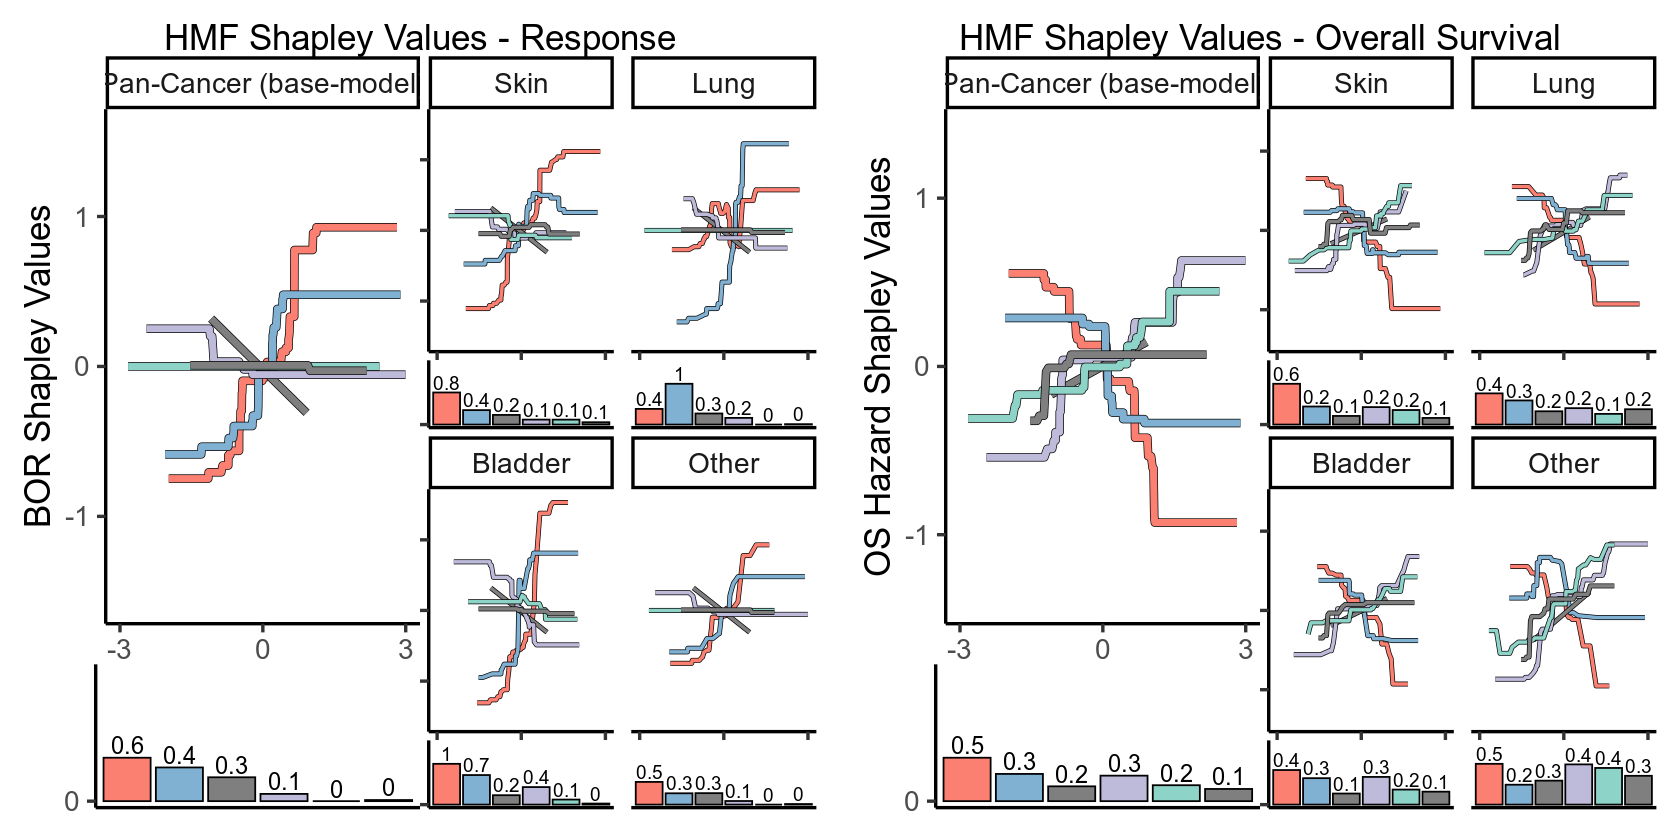

In [38]:
as_ggplot(together)

### 3 - Save for later

In [11]:
saveRDS( list("ll_ready" = ll_ready, "oo_ready" = oo_ready, "together" = together), 
              paste0(FIG_DIR, "shapley_pdp_plots.Rds"))